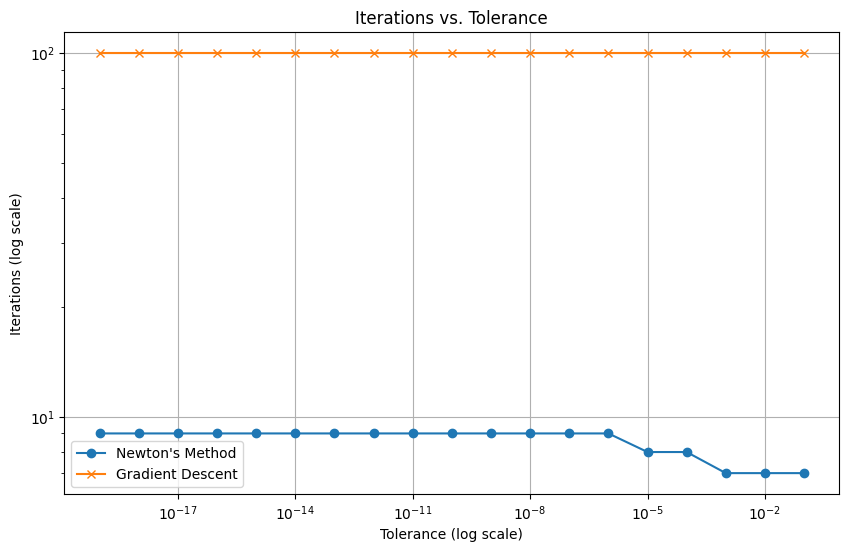

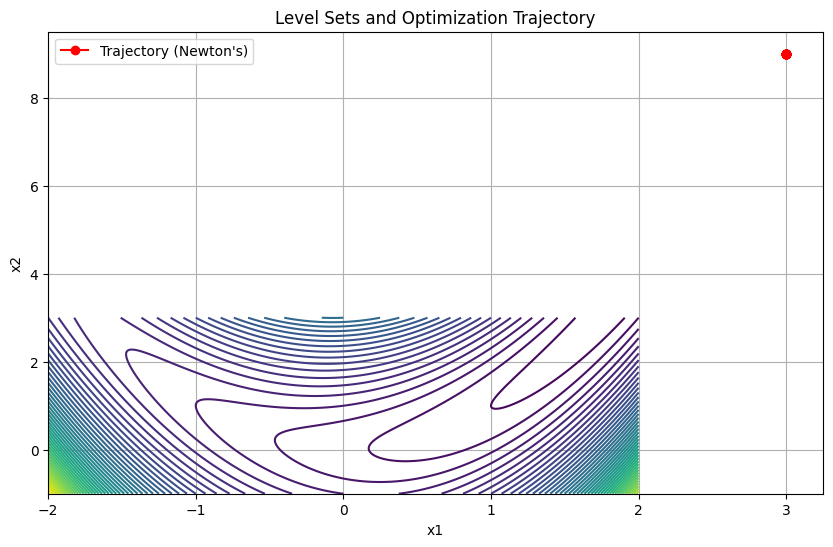

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (Update `roll_number_last_digit` with your actual roll number's last digit)
roll_number_last_digit = 3
b = 10 - roll_number_last_digit
a = 1 if b % 2 == 0 else 2

# Function definition
def f(x):
    x1, x2 = x
    return (a + 1 - x1)**2 + b * (x2 - x1**2)**2

# Gradient
def grad_f(x):
    x1, x2 = x
    df_dx1 = -2 * (a + 1 - x1) - 4 * b * x1 * (x2 - x1**2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Hessian
def hessian_f(x):
    x1, x2 = x
    h11 = 2 - 4 * b * (x2 - x1**2) + 8 * b * x1**2
    h12 = -4 * b * x1
    h21 = h12
    h22 = 2 * b
    return np.array([[h11, h12], [h21, h22]])

# Newton's Method (Algorithm 3)
def newtons_method(x0, tol, max_iter=100):
    x = np.array(x0, dtype=float)
    iter_count = 0
    while np.linalg.norm(grad_f(x), 2) > tol and iter_count < max_iter:
        hess_inv = np.linalg.inv(hessian_f(x))
        x = x - np.dot(hess_inv, grad_f(x))
        iter_count += 1
    return x, f(x), iter_count

# Gradient Descent (Algorithm 2)
def gradient_descent(x0, tol, eta=0.001, max_iter=100):
    x = np.array(x0, dtype=float)
    iter_count = 0
    while np.linalg.norm(grad_f(x), 2) > tol and iter_count < max_iter:
        x = x - eta * grad_f(x)
        iter_count += 1
    return x, f(x), iter_count

# Experiment setup
x0 = [-1.5, 1.5]
tolerances = [10**-p for p in range(1, 20)]
results_newton = []
results_gradient = []

# Run experiments
for tol in tolerances:
    results_newton.append(newtons_method(x0, tol))
    results_gradient.append(gradient_descent(x0, tol))

# Extract results
iters_newton = [res[2] for res in results_newton]
iters_gradient = [res[2] for res in results_gradient]

# Plot iterations vs. tolerance
plt.figure(figsize=(10, 6))
plt.plot(tolerances, iters_newton, label="Newton's Method", marker='o')
plt.plot(tolerances, iters_gradient, label="Gradient Descent", marker='x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tolerance (log scale)')
plt.ylabel('Iterations (log scale)')
plt.title('Iterations vs. Tolerance')
plt.legend()
plt.grid(True)
plt.show()

# Level sets and trajectory
x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
trajectory = np.array([res[0] for res in results_newton])
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', label="Trajectory (Newton's)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Optimization Trajectory')
plt.legend()
plt.grid(True)
plt.show()


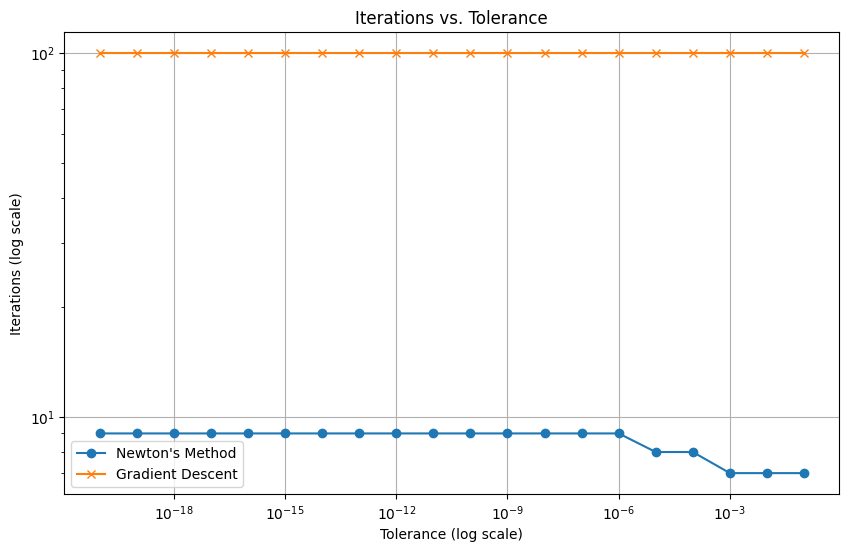

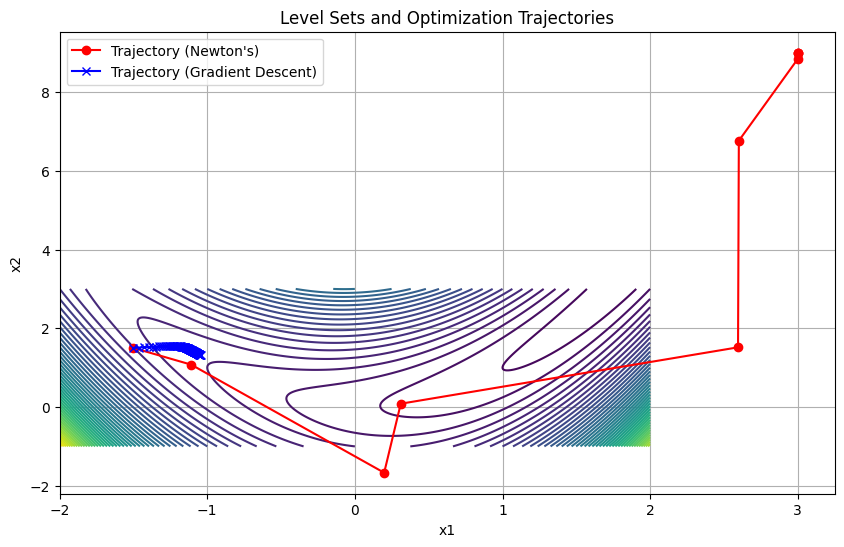

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (Update `roll_number_last_digit` with your actual roll number's last digit)
roll_number_last_digit = 3  # Replace with your roll number's last digit
b = 10 - roll_number_last_digit
a = 1 if b % 2 == 0 else 2

# Function definition
def f(x):
    x1, x2 = x
    return (a + 1 - x1)**2 + b * (x2 - x1**2)**2

# Gradient
def grad_f(x):
    x1, x2 = x
    df_dx1 = -2 * (a + 1 - x1) - 4 * b * x1 * (x2 - x1**2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Hessian
def hessian_f(x):
    x1, x2 = x
    h11 = 2 - 4 * b * (x2 - x1**2) + 8 * b * x1**2
    h12 = -4 * b * x1
    h21 = h12
    h22 = 2 * b
    return np.array([[h11, h12], [h21, h22]])

# Newton's Method (Algorithm 3)
def newtons_method(x0, tol, max_iter=100):
    x = np.array(x0, dtype=float)
    iter_count = 0
    trajectory = [x.copy()]  # To store the optimization path
    while np.linalg.norm(grad_f(x), 2) > tol and iter_count < max_iter:
        hess_inv = np.linalg.inv(hessian_f(x))
        x = x - np.dot(hess_inv, grad_f(x))
        trajectory.append(x.copy())
        iter_count += 1
    return x, f(x), iter_count, trajectory

# Gradient Descent (Algorithm 2)
def gradient_descent(x0, tol, eta=0.001, max_iter=100):
    x = np.array(x0, dtype=float)
    iter_count = 0
    trajectory = [x.copy()]  # To store the optimization path
    while np.linalg.norm(grad_f(x), 2) > tol and iter_count < max_iter:
        x = x - eta * grad_f(x)
        trajectory.append(x.copy())
        iter_count += 1
    return x, f(x), iter_count, trajectory

# Experiment setup
x0 = [-1.5, 1.5]
tolerances = [10**-p for p in range(1, 21)]
results_newton = []
results_gradient = []

# Run experiments for different tolerances
for tol in tolerances:
    results_newton.append(newtons_method(x0, tol))
    results_gradient.append(gradient_descent(x0, tol))

# Extract data for plots
iters_newton = [res[2] for res in results_newton]
iters_gradient = [res[2] for res in results_gradient]

# Plot iterations vs. tolerance
plt.figure(figsize=(10, 6))
plt.plot(tolerances, iters_newton, label="Newton's Method", marker='o')
plt.plot(tolerances, iters_gradient, label="Gradient Descent", marker='x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tolerance (log scale)')
plt.ylabel('Iterations (log scale)')
plt.title('Iterations vs. Tolerance')
plt.legend()
plt.grid(True)
plt.show()

# Level sets and trajectory for Newton's method
# Level sets and trajectory for Newton's method and gradient descent
x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')

# Extract the trajectory for the smallest tolerance
trajectory_newton = results_newton[-1][3]  # Trajectory for the smallest tolerance (Newton's method)
trajectory_gradient = results_gradient[-1][3]  # Trajectory for the smallest tolerance (Gradient descent)

# Convert to numpy arrays for easy plotting
trajectory_newton = np.array(trajectory_newton)
trajectory_gradient = np.array(trajectory_gradient)

# Plot the trajectories
plt.plot(trajectory_newton[:, 0], trajectory_newton[:, 1], 'r-o', label="Trajectory (Newton's)")
plt.plot(trajectory_gradient[:, 0], trajectory_gradient[:, 1], 'b-x', label="Trajectory (Gradient Descent)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Optimization Trajectories')
plt.legend()
plt.grid(True)
plt.show()
